# Bike Sharing Linear Regression Assignment - Ganesh Nagappa Shetty

## Problem Statement:
<br>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## 1. Reading and Understanding the Data

Let us first import necessary libraries, dataset and try to understand the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Load the dataset and check initial entries of the dataset
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2. Cleaning the data

### 2.1 Checking for missing values and cleaning data types

In [4]:
# Since instant is a continuous index value of the dataset entries this will not help us in prediction or drawing insights. We can therefore drop it
df.drop('instant',axis=1,inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Lets check the shape of the dataframe
df.shape

(730, 15)

In [6]:
#Lets check information about missing values & Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


**Observation:** There are no missing values in the data and data types are also largly on the expected lines. date variable(dteday) has repeated information as Month and Year are present as variables mnth and yr respectively. We will extract only day of the month and drop the dteday variable

In [7]:
df['day']=df.dteday.apply(lambda x: int(x.split('-')[0]))
df.drop('dteday',axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [8]:
#Lets check the information of the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  day         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


Now we have a clean dataset without any missing values

### 2.2 Outlier Analysis

In [9]:
# Statistical Summary of Dataframe
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,15.720548
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,8.802278
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,8.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,31.000000


**Observation:** The categorical variables such as season, yr, mnth, holiday, weekday, workingday, weathersit & day doesn't seem to be having outliers. Lets have a close look at other columns

#### 2.2.1 Outlier analysis in Humidity and Wind Speed Variables

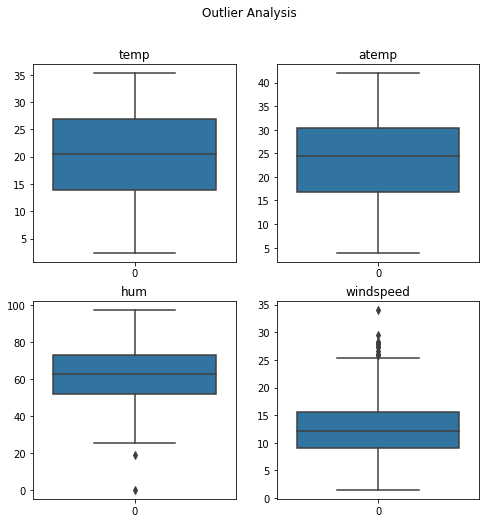

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

fig.suptitle('Outlier Analysis')
sns.boxplot(ax=axes[0, 0], data=df['temp'])
axes[0, 0].set_title('temp')
sns.boxplot(ax=axes[0, 1], data=df['atemp'])
axes[0, 1].set_title('atemp')
sns.boxplot(ax=axes[1, 0], data=df['hum'])
axes[1, 0].set_title('hum')
sns.boxplot(ax=axes[1, 1], data=df['windspeed'])
axes[1, 1].set_title('windspeed')

plt.show()

Lets have close look into Humidity(hum) and Wind Speed (windspeed)

In [11]:
df[['hum','windspeed']].describe()

,hum,windspeed
count,730.000000,730.000000
mean,62.765175,12.763620
std,14.237589,5.195841
min,0.000000,1.500244
25%,52.000000,9.041650
50%,62.625000,12.125325
75%,72.989575,15.625589
max,97.250000,34.000021


In [12]:
len(df[df.hum==0])

1

**Observation:** Humidity of 0% is highly unlikely event. This is a clear outlier and we have only one such incident which we could term as outlier and drop it from our analysis

In [13]:
# Dropping extreme outlier in humidity
df=df[df.hum>0]
# Statistical Summary of Humidity
df.hum.describe()

count    729.000000
mean      62.851273
std       14.055910
min       18.791700
25%       52.000000
50%       62.666700
75%       73.000000
max       97.250000
Name: hum, dtype: float64

Since windspeed of 34 is practically possible, lets cap the windspeed values within 75% + 3.0*IQR

In [14]:
# IQR for Wind Speed
windspeedIQR=np.percentile(df.windspeed,75)-np.percentile(df.windspeed,25)

# Upper Limit to omit outliers in Wind Speed
windspeedUL=np.percentile(df.windspeed,75)+(3*windspeedIQR)
windspeedUL

35.374793999999994

**Observation:** We can see that maximum wind speed is within 75%+3.0*IQR. We will have this data in our analysis

#### 2.2.2 Outlier analysis in Count Variable

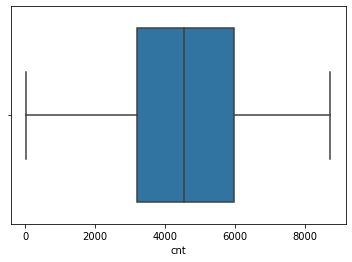

In [15]:
sns.boxplot(df.cnt)
plt.show()

**Observation:** We do not see any outlier in Count variable.
    
Now our data is clean and free of outliers. Lets handle Categorical data.

#### 2.2.3 Conversion of season and weathersit variables as Categorical Strings

In [16]:
# Conversion of season variable to categorical strings
d={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season']=df.season.apply(lambda x: d[x])

In [17]:
df.weathersit.value_counts()

1    463
2    246
3     20
Name: weathersit, dtype: int64

Similar to Season, weathersit variable has values as 1, 2, 3, 4 which means

		- 1: Clear, Few clouds, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We can see that only 3 cases are present in weathersit. Case 4 which is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is not present in the dataset. Therefore we will consider only 3 of the available cases.

lets name them as (1:Clear_Cloudy,2:Mist_Cloudy,3:LightRain_LightSnow)

In [18]:
#Lets name weathersit variables as (1:Clear_Cloudy,2:Mist_Cloudy,3:LightRain_LightSnow, 4:HeavyRain_Foggy)
d={1:'Clear_Cloudy',2:'Mist_Cloudy',3:'LightRain_LightSnow'}
df['weathersit']=df.weathersit.apply(lambda x: d[x])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,spring,0,1,0,1,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,spring,0,1,0,2,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,spring,0,1,0,3,1,Clear_Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,spring,0,1,0,4,1,Clear_Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,spring,0,1,0,5,1,Clear_Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


## 3. Data Visualization

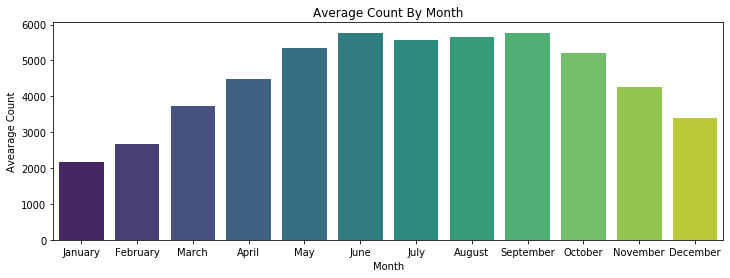

In [19]:
# Distribution of Count vs Month
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=df,x="mnth",y="cnt",palette='viridis',ci=None)
ax.set_xticklabels(["January","February","March","April","May","June","July","August","September","October","November","December"])
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
plt.show()

**Observation:** Bike Sharing grows gradually from January till june. Period from June to September is the clear peak season. Post september sharing goes down.

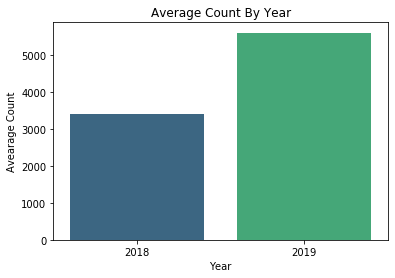

In [20]:
# Growth of Bike sharing over the years
fig, ax = plt.subplots()
sns.barplot(x='yr',y='cnt',data=df,palette='viridis',ci=None)
ax.set_xticklabels(['2018','2019'])
ax.set(xlabel='Year', ylabel='Avearage Count',title="Average Count By Year")
plt.show()

**Observation:** Bike Sharing is growing over the year

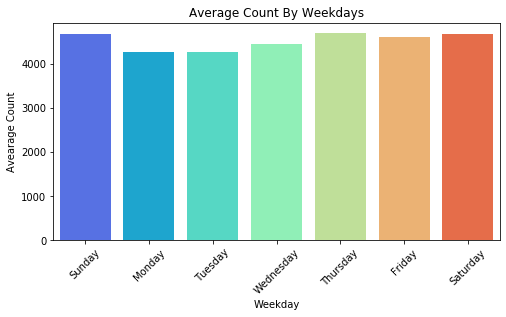

In [21]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='weekday',y='cnt',data=df,palette='rainbow',ci=None)
ax.set_xticklabels(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Weekday', ylabel='Avearage Count',title="Average Count By Weekdays")
plt.xticks(rotation=45)
plt.show()

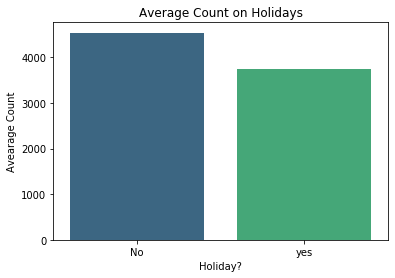

In [22]:
fig, ax = plt.subplots()
sns.barplot(x='holiday',y='cnt',data=df,palette='viridis',ci=None)
ax.set_xticklabels(["No","yes"])
ax.set(xlabel='Holiday?', ylabel='Avearage Count',title="Average Count on Holidays")
plt.show()

**Observation:** 
1. We can generally observe that people are sharing bikes less on holidays compared to no holiday days.
2. On weekdays days except for slight dip on Monday and Tuesday, almost all days have similar bike sharing counts. 

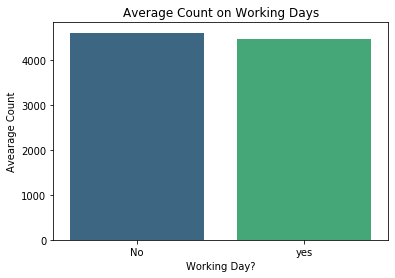

In [23]:
sns.set_style()
fig, ax = plt.subplots()
sns.barplot(x='workingday',y='cnt',data=df,palette='viridis',ci=None)
ax.set_xticklabels(["No","yes"])
ax.set(xlabel='Working Day?', ylabel='Avearage Count',title="Average Count on Working Days")
plt.show()

**Observation:** Non-working days have slightly better bike sharing count than working days. We have observed above that  holidays have generally less number of bike sharing. In that case most of the bike sharing counts on non-working days are coming from Weekends.

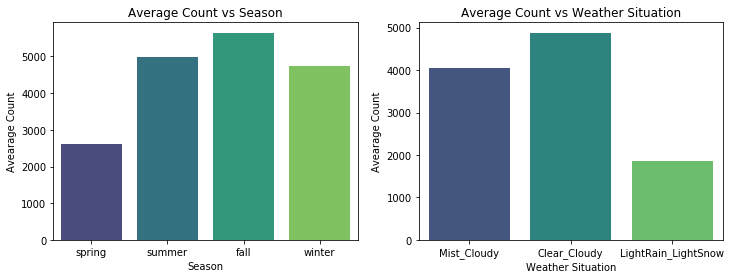

In [24]:
sns.set_style()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='season',y='cnt',data=df,palette='viridis',ax=ax1,ci=None)
ax1.set(xlabel='Season', ylabel='Avearage Count',title="Average Count vs Season")

sns.barplot(x='weathersit',y='cnt',data=df,palette='viridis',ax=ax2,ci=None)
ax2.set(xlabel='Weather Situation', ylabel='Avearage Count',title="Average Count vs Weather Situation")
plt.show()

**Observation:** 
1. Fall season and summer season turned out to be peak seasons as it is conductive to ride bikes on those weather when compared to Spring.
2. Similar to the case with seasons, when it is clear or cloudy people use more bikes than when it is rainy or snowy.

The reason is the obvious. When it rains or snows its slippery as well as rider gets wet. That could be one reason why people bike less in Spring or when its rainy or snowy.

In [25]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

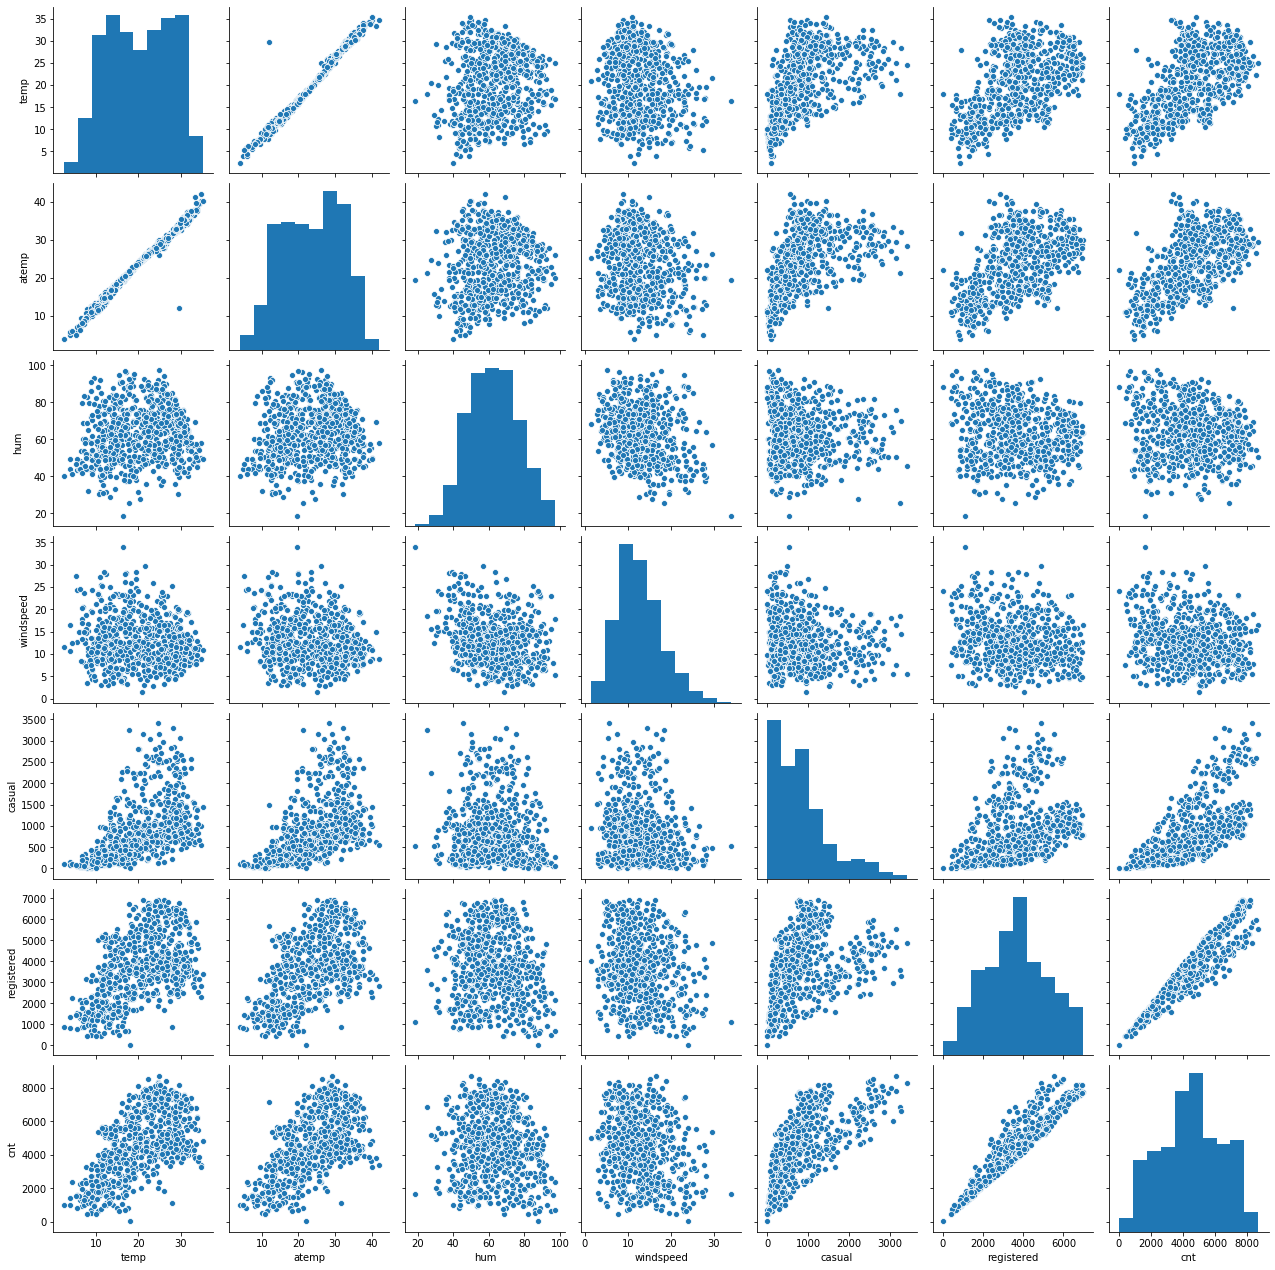

In [26]:
# Lets check the correlations between non-categorical variables
col=['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']
sns.pairplot(data=df[col])
plt.show()

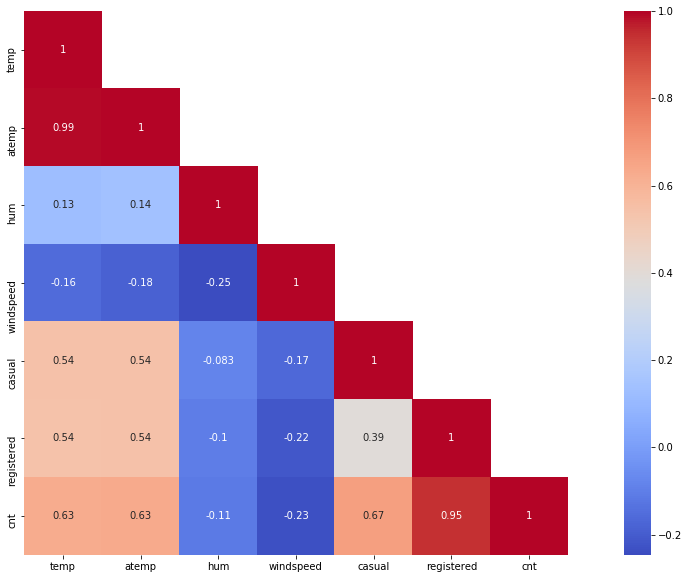

In [27]:
#Heat-map to show correlation between variables
corrMatt = df[col].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,cmap='coolwarm', square=True,annot=True)
plt.show()

**Observation:** 
1. From above graphs we can observe that `temp` and `atemp` variables are highly correlated with each other which would result in multicolinearity. Therefore we will drop atemp variable from our analysis
2. We can also see that `registered`(count of registered users) and `casual`(count of casual users) have good correlation with target variable count. However when we check the description of `cnt` variable its sum of `casual` and `registered` users. If we have them in our data it will cause data leakage problem. we shall therefore drom them from our analysis

In [28]:
df.drop(['atemp','casual','registered'],axis=1,inplace=True)

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,spring,0,1,0,1,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1
1,spring,0,1,0,2,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,2
2,spring,0,1,0,3,1,Clear_Cloudy,8.050924,43.7273,16.636703,1349,3
3,spring,0,1,0,4,1,Clear_Cloudy,8.200000,59.0435,10.739832,1562,4
4,spring,0,1,0,5,1,Clear_Cloudy,9.305237,43.6957,12.522300,1600,5


## 4. Handling Categorical Data

Since there is no order to season and weathersit variables, we can create dummy variables out of it

In [30]:
#Creation of dummy variables out of Season variable
season = pd.get_dummies(df['season'], drop_first = True)
df = pd.concat([df, season], axis = 1)

#Creation of dummy variables out of weathersit variable
weather = pd.get_dummies(df['weathersit'], drop_first = True)
df = pd.concat([df, weather], axis = 1)

#Dropping season variable
df.drop(['season','weathersit'],axis=1,inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,LightRain_LightSnow,Mist_Cloudy
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,1,1,0,0,0,1
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,2,1,0,0,0,1
2,0,1,0,3,1,8.050924,43.7273,16.636703,1349,3,1,0,0,0,0
3,0,1,0,4,1,8.200000,59.0435,10.739832,1562,4,1,0,0,0,0
4,0,1,0,5,1,9.305237,43.6957,12.522300,1600,5,1,0,0,0,0


Now we have clean data. Lets go ahead and split the data into Training set and Testing set in 70-30 proportion

## 5. Splitting the Data into Training and Testing Sets

In [31]:
# Lets split the data into Training and testing sets (70%-30% combination)
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

We see that several features are in larger scale compared to other. Lets scale Training data sets using minmax scaler

## 6. Dataset Preparation
### 6.1 Rescaling the Features 

In [32]:
#variables in the data
df.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'cnt', 'day', 'spring', 'summer', 'winter',
       'LightRain_LightSnow', 'Mist_Cloudy'],
      dtype='object')

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,LightRain_LightSnow,Mist_Cloudy
626,1,9,0,4,1,0.614763,0.450242,0.371638,0.864421,19,0,0,0,0,0
364,0,12,0,1,1,0.437201,0.552447,0.382342,0.247978,31,1,0,0,0,0
426,1,3,0,0,0,0.442393,0.559440,0.255342,0.438851,3,1,0,0,0,1
728,1,12,0,1,1,0.245101,0.381387,0.663106,0.164795,30,1,0,0,0,0
482,1,4,0,0,0,0.395666,0.389456,0.188475,0.457443,28,0,1,0,0,1


### 6.2 Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

## 7. Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### 7.1 RFE
Recursive feature elimination

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
#Ranking of Features as per RFE function
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 2),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('LightRain_LightSnow', True, 1),
 ('Mist_Cloudy', True, 1)]

In [38]:
#Selected Top 12 Variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'LightRain_LightSnow', 'Mist_Cloudy'],
      dtype='object')

In [39]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.25e-180
Time:                        13:31:06   Log-Likelihood:                 461.41
No. Observations:                 510   AIC:                            -896.8
Df Residuals:                     497   BIC:                            -841.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2297    

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,18.49
4,temp,12.76
6,windspeed,4.69
3,workingday,3.36
7,spring,3.27
2,weekday,3.23
9,winter,2.58
11,Mist_Cloudy,2.48
0,yr,2.12
8,summer,2.04


**Observation:** VIF of hum and temp are quite high. however p-value of `weekday` variable is insignificant. We can drop it from the analysis. This may change the VIF of hum and temp variables

In [42]:
#dropping insignificant weekday variable
X_train_rfe = X_train_rfe.drop(['weekday'], axis=1)

In [43]:
#Rebuilding second model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_rfe)

# Running the linear model
lm2 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.44e-181
Time:                        13:31:06   Log-Likelihood:                 460.85
No. Observations:                 510   AIC:                            -897.7
Df Residuals:                     498   BIC:                            -846.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2352    

In [44]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,18.44
3,temp,12.07
5,windspeed,4.69
2,workingday,3.36
6,spring,3.11
8,winter,2.49
10,Mist_Cloudy,2.47
0,yr,2.12
7,summer,1.99
9,LightRain_LightSnow,1.31


**Observation:** Now all features have a p-value less than 0.03.But we still have hum and temp with high VIF. We will go ahead and drop the feature with highest VIF. We will drop hum from analysis and redo the calculation

In [45]:
#dropping hum variable
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [46]:
#Rebuilding Third model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_rfe)

# Running the linear model
lm3 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          5.85e-180
Time:                        13:31:07   Log-Likelihood:                 454.22
No. Observations:                 510   AIC:                            -886.4
Df Residuals:                     499   BIC:                            -839.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1869    

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.76
4,windspeed,4.46
2,workingday,3.27
5,spring,2.12
0,yr,2.10
6,summer,1.76
7,winter,1.69
9,Mist_Cloudy,1.55
1,holiday,1.10
8,LightRain_LightSnow,1.05


**Observation:** Now all features have p-value less than 0.03 and VIF less than 5. We now have a model which is free of multicolinearity and insignificant features

## 8. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [48]:
y_train_count = lm3.predict(X_train_new)

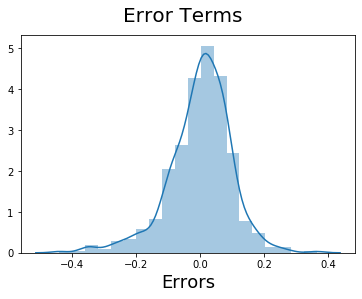

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)
# X-label
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Observation:** We can see that error terms are normally distributed around a mean of zero. This satisfies the assumption of linear regression

## 9. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model(3rd model)

### 9.1 Applying the scaling on the test sets. Only transforming not fitting

In [50]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [51]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,LightRain_LightSnow,Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,6.337900,0.031963,2.954338,0.698630,0.551850,0.562174,0.319257,0.484718,15.210046,0.251142,0.273973,0.237443,0.041096,0.310502
std,0.500513,3.408701,0.176306,1.992582,0.459904,0.235346,0.179169,0.157824,0.227716,8.649213,0.434663,0.447017,0.426491,0.198967,0.463759
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.131791,-0.042808,-0.049378,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.336479,0.427649,0.213225,0.330677,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.561806,0.548144,0.303481,0.497042,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.746636,0.689408,0.400400,0.635156,23.000000,0.500000,1.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.983385,1.012910,0.807474,0.941205,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 9.2 Dividing into X_test and y_test

In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

### 9.3 Preparing the test dataset

In [53]:
# Adding constant variable to test dataframe
import statsmodels.api as sm 
X_test_m3 = sm.add_constant(X_test)

In [54]:
# Creating X_test_m3 dataframe by dropping variables from X_test_m3
X_test_m3 = X_test_m3.drop(["mnth", "day", "weekday","hum"], axis = 1)

In [55]:
# Making predictions using the third model
y_pred = lm3.predict(X_test_m3)

## 10. Model Evaluation

Let's now plot the graph for actual versus predicted values.

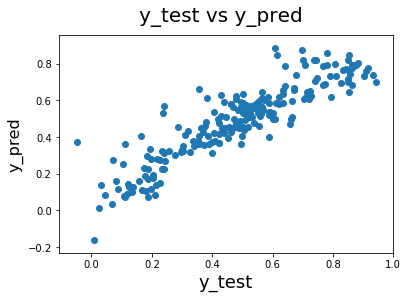

In [56]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 20) 
# X-label
plt.xlabel('y_test', fontsize = 18) 
# y-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

**Observation:** we can see that actual values of test data and predictions are having good linear relationship between them. Which is an indication that model is predicted good. Lets check some more parameters

In [57]:
#Model parameters
round(lm3.params,3)

const                  0.187
yr                     0.242
holiday               -0.096
workingday            -0.028
temp                   0.509
windspeed             -0.130
spring                -0.091
summer                 0.034
winter                 0.081
LightRain_LightSnow   -0.263
Mist_Cloudy           -0.078
dtype: float64

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8066243239993064

**Observation:**

we have good r2 score of 80%.

We can see that the equation of our best fitted line is:

$ cnt = 0.187 + 0.242  \times  yr - 0.096  \times  holiday - 0.028 \times workingday + 0.509 \times temp - 0.130 \times windspeed - 0.091 \times spring + 0.034 \times summer + 0.081 \times winter - 0.263 \times LightRain-LightSnow - 0.078 \times Mist-Cloudy $    